In [1]:
import sys
sys.path.append("/mnt/d/work/searchformer")

In [2]:
from searchformer.sokoban import SokobanTrace,SokobanRenderer,SimpleSokobanTokenizer,sokoban_state_to_pretty_string
import pygame
import json

pygame 2.6.1 (SDL 2.28.4, Python 3.10.0)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:
with open("/mnt/d/work/searchformer/trace.json") as file:
    trace=json.load(file)

In [4]:
start_state=trace['sokoban_start']

In [5]:
actions=[]
for action in trace['trace']:
    if action['action']=='create' or action['action']=='close':
    # if action['action']=='plan':
        state=action['state']['state']
        actions.append(state)

In [6]:
len(actions)

388

In [3]:
renderer=SokobanRenderer(width=6,height=6,record_dir="D:\\work\\searchformer\\record_dir",assets_dir="D:\\work\\searchformer\\sokoban")
pygame.init()
clock = pygame.time.Clock()
running = True

while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

    for action in actions:
        renderer.render(game_state=action)
        pygame.display.flip()
        clock.tick(1)  # Optional: limit to 30 FPS
    # renderer.img_to_file()
    

pygame.quit()

NameError: name 'actions' is not defined

In [7]:
from PIL import Image
import os
from typing import List
from searchformer.sokoban import CellState
from PIL import Image, ImageDraw, ImageFont

class SokobanPILRenderer:
    def __init__(self, assets_dir: str, tile_size: int = 32):
        self.assets_dir = os.path.join(assets_dir, "images")
        self.tile_size = tile_size
        self.tiles = {
            CellState.wall: self.load("wall.png"),
            CellState.dock: self.load("dock.png"),
            CellState.floor: self.load("floor.png"),
            CellState.box: self.load("box.png"),
            CellState.box_on_dock: self.load("box_docked.png"),
            CellState.worker_on_floor: self.load("worker.png"),
            CellState.worker_on_dock: self.load("worker_dock.png"),
        }
        # You can also use a TTF font for better styling
        self.font = ImageFont.load_default()

    def load(self, filename):
        path = os.path.join(self.assets_dir, filename)
        assert os.path.exists(path), f"Image {path} not found."
        return Image.open(path).convert("RGBA").resize((self.tile_size, self.tile_size))

    def render_to_image(
        self,
        game_state: List[List[str]],
        action: str,
        cost_from_start: float,
        heuristic: float
    ) -> Image.Image:
        height = len(game_state)
        width = len(game_state[0])
        img = Image.new("RGBA", (width * self.tile_size, (height + 1) * self.tile_size), (255, 226, 191, 255))
        draw = ImageDraw.Draw(img)

        for y, row in enumerate(game_state):
            for x, cell in enumerate(row):
                tile = self.tiles.get(cell)
                if tile:
                    img.paste(tile, (x * self.tile_size, y * self.tile_size), mask=tile)

        # Write metadata below the board
        info_y = height * self.tile_size + 2
        draw.text((5, info_y), f"Action: {action}", font=self.font, fill=(0, 0, 0))
        draw.text((150, info_y), f"g: {cost_from_start}", font=self.font, fill=(0, 0, 0))
        draw.text((150, info_y+15), f"h: {heuristic}", font=self.font, fill=(0, 0, 0))

        return img


In [8]:
sokoban_pil_renderer=SokobanPILRenderer(assets_dir="/mnt/d/work/searchformer/sokoban")

In [9]:
start_state=[
        ["#", "#", "#", "#", "#", "#"
        ],
        ["#", " ", " ", " ", "@", "#"
        ],
        ["#", "#", "$", "$", " ", "#"
        ],
        ["#", ".", " ", ".", " ", "#"
        ],
        ["#", "#", " ", " ", " ", "#"
        ],
        ["#", "#", "#", "#", "#", "#"
        ]
    ]

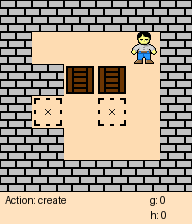

In [10]:
sokoban_pil_renderer.render_to_image(game_state=start_state,action='create',cost_from_start=0,heuristic=0)

In [13]:
import os
record_dir="/mnt/d/work/searchformer/trace_dir"

In [66]:
# start state
sokoban_pil_renderer.render_to_image(trace['sokoban_start'],action='start',cost_from_start=0,heuristic=0).save(os.path.join(record_dir,"start_state.png"))

In [14]:
for index, act in enumerate(trace['trace']):
    sokoban_pil_renderer.render_to_image(game_state=act['state']['state'],cost_from_start=act['cost_from_start'],heuristic=act['heuristic'],action=act['action']).save(os.path.join(record_dir,f"trace_{index}.png"))